<a href="https://colab.research.google.com/github/ngoantnut/data-science-by-Huy-teacher/blob/master/K185480106014_TranVanNgoan_Predic_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 # Khai bao model tuyến tính có sử dụng hệ số b

**Trần Văn Ngoan**
**K185480106014**

In [50]:
data= pd.read_csv("https://raw.githubusercontent.com/sonrasa2k/hongtin_dudoangianha/master/Real%20estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


 **Sử dụng hồi quy tuyến tính**

In [52]:
x_train = data.iloc[:, 1:7].values
y_train = data.iloc[:, -1].values

In [53]:
from sklearn.linear_model import LinearRegression as LR
model_ski=LR(fit_intercept=True)

In [54]:
import numpy as np
X_train=x_train
print(X_train.shape)
model_ski.fit(X_train,y_train)

(414, 6)


LinearRegression()

In [55]:
print('a=',model_ski.coef_)
print('b=',model_ski.intercept_)

a= [ 5.14622746e+00 -2.69695448e-01 -4.48746107e-03  1.13327690e+00
  2.25472976e+02 -1.24236012e+01]
b= -14437.100802280542


**Nhập kiểm tra dữ liệu**

In [56]:
print('Input X1 transaction date:')
x1=input()
print('Input X2 house age:')
x2=input()
print('Input X3 distance to the nearest MRT station:')
x3=input()
print('Input X4 number of convenience stores:')
x4=input()
print('Input X5 latitude:')
x5=input()
print('Input X6 longitude:')
x6=input()

x1=float(x1)
x2=float(x2)
x3=float(x3)
x4=float(x4)
x5=float(x5)
x6=float(x6)

price=model_ski.predict([[x1,x2,x3,x4,x5,x6]])
print(price)

Input X1 transaction date:
2012.917
Input X2 house age:
32
Input X3 distance to the nearest MRT station:
84.87882
Input X4 number of convenience stores:
10
Input X5 latitude:
24.98298
Input X6 longitude:
121.54024
[47.1689389]


*XYZ*

In [57]:
du_doan=model_ski.predict(X_train)

In [58]:
data["Gia du doan"] = du_doan
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Gia du doan
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,47.168939
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,47.825734
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,48.796778
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,48.369641
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,46.138865


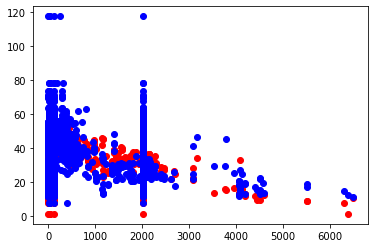

In [59]:
import matplotlib.pyplot as plt
plt.plot(X_train, du_doan,'ro')
plt.plot(X_train, y_train,'bo')

**Tính sai số trung  bình**

In [60]:
error = (y_train-du_doan)**2
n= error.shape[0]
error = np.sqrt(error.sum()/n)

In [61]:
print("Sai số trung bình là: ")
error

Sai số trung bình là: 


8.782466464602772

In [62]:
data["do_lech"] = np.abs(data["Y house price of unit area"]-du_doan)
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Gia du doan,do_lech
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,47.168939,9.268939
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,47.825734,5.625734
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,48.796778,1.496778
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,48.369641,6.430359
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,46.138865,3.038865


**Lọc ngưỡng**



In [63]:
nguong = 1.5*error
dt_clone= data[data["do_lech"]>nguong]

In [66]:
dt_clone.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Gia du doan,do_lech
16,17,2013.250,0.0,292.9978,6,24.97744,121.54458,70.1,50.742815,19.357185
31,32,2012.750,29.6,769.4034,7,24.98281,121.53408,25.0,40.523379,15.523379
47,48,2013.583,35.9,640.7391,3,24.97563,121.53715,61.5,37.498337,24.001663
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0,48.596838,22.403162
113,114,2013.333,14.8,393.2606,6,24.96172,121.53812,7.6,43.264355,35.664355


In [65]:
dt_clone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 16 to 389
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      28 non-null     int64  
 1   X1 transaction date                     28 non-null     float64
 2   X2 house age                            28 non-null     float64
 3   X3 distance to the nearest MRT station  28 non-null     float64
 4   X4 number of convenience stores         28 non-null     int64  
 5   X5 latitude                             28 non-null     float64
 6   X6 longitude                            28 non-null     float64
 7   Y house price of unit area              28 non-null     float64
 8   Gia du doan                             28 non-null     float64
 9   do_lech                                 28 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 2.4 KB


Có 28 giá trị nhiễu với ngưỡng ta đặt ra